In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

H0,H1的假设规则：1.原假设必须包含等号（=、≤、≥）2.H0是研究者想要推翻的假设，H1是研究者想要证明的假设

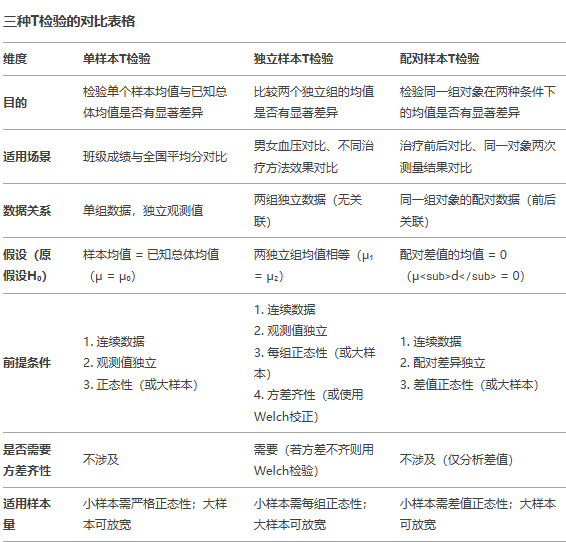

## Z检验

σ已知，用Z检验

In [6]:
#例1：一种元件,要求其使用寿命不低于1000(小时),现在从一批这种元件中随机抽取25件,测得其寿命平均值为950(小时)。
#已知这种元件寿命服从标准差“=100(小时)的正态分布，试在显著水平0.05下确定这批元件是否合格。

# 1. 提出假设
# H0: 总体均值 >= 1000    
# H1: 总体均值 < 1000  （左侧检验）

# 2. 参数设置
n = 25
x_bar = 950
sigma = 100  # 总体标准差
mu0 = 1000   # 假设的总体均值

# 3. 计算Z统计量
z_score = (x_bar - mu0) / (sigma / (n**0.5))
print("Z值:", z_score)  # 输出：-2.5

# 4. 计算左侧P值
from scipy import stats
p_value = stats.norm.cdf(z_score)
print("P值:", p_value)  # 输出：约0.0062

# 5. 决策（α=0.05）
alpha = 0.05
if p_value < alpha:
    print("拒绝H0，元件寿命显著低于1000小时，不合格。")
else:
    print("不拒绝H0，无证据表明元件不合格。")

# 输出结果：拒绝H0，元件不合格。

Z值: -2.5
P值: 0.006209665325776132
拒绝H0，元件寿命显著低于1000小时，不合格。


## 单样本T检验

In [14]:
# 列2: 某厂生产的灯泡其包装上声明生命时长为1000小时，现检验某生产线生产灯泡是否合规？

# 示例：均值为1000，标准差50的正态分布
sample = np.random.normal(1000, 50, 40).round(1)
print(sample)
print("\n")

#1. 提出假设 
#   H0:均值=1000  
#   H1: 均值!=1000  #双侧检验

[ 937.6 1081.6  928.5  978.  1006.5 1072.1  928.2 1058.2 1000.5  950.9
 1023.1 1010.   970.  1003.5  980.7 1005.7 1033.1 1079.3  938.1 1106.7
  902.4  992.4 1029.4 1014.   968.9  989.6  975.3  970.5 1042.5 1017.9
  965.4 1045.  1015.4 1040.6 1031.5  958.6  972.  1037.4 1030.5  999. ]




In [15]:
# --------------------- Shapiro-Wilk 正态性检验 ---------------------
statistic, p_value = scipy.stats.shapiro(sample)
#输出结果
print("Shapiro-Wilk检验统计量 (W):", round(statistic, 4))
print("p值:", round(p_value, 4))
#小概率
alpha = 0.05
if p_value > alpha:
    print("数据服从正态分布 (不拒绝原假设)")
else:
    print("数据不服从正态分布 (拒绝原假设)")
print("\n")


# --------------------- K-S 正态性检验 ---------------------
# 1. 计算样本均值和标准差
mean_sample = np.mean(sample)
std_sample = np.std(sample, ddof=1)  # 无偏标准差（样本标准差）

# 2. 执行K-S检验
# 原假设 H₀：样本服从正态分布 N(mean_sample, std_sample^2)
statistic, p_value = stats.kstest(
    sample, 
    'norm',  # 检验正态分布
    args=(mean_sample, std_sample)  # 传入理论分布的参数（loc=均值，scale=标准差）
)

# 3. 输出结果
print("\nK-S检验统计量 (D):", round(statistic, 4))
print("p值:", round(p_value, 4))

alpha = 0.05
if p_value > alpha:
    print("数据服从正态分布 (不拒绝原假设)")
else:
    print("数据不服从正态分布 (拒绝原假设)")
print("\n")



# --------------------- Normaltest 正态性检验 ---------------------
statistic, p_value = scipy.stats.normaltest(sample)
# 输出结果
print("Normaltest 统计量:", round(statistic, 4))
print("p值:", round(p_value, 4))
# 判断显著性（α=0.05）
alpha = 0.05
if p_value > alpha:
    print("数据服从目标分布 (不拒绝原假设)")
else:
    print("数据不服从目标分布 (拒绝原假设)")
print("\n")


Shapiro-Wilk检验统计量 (W): 0.9918
p值: 0.9909
数据服从正态分布 (不拒绝原假设)



K-S检验统计量 (D): 0.055
p值: 0.9992
数据服从正态分布 (不拒绝原假设)


Normaltest 统计量: 0.0583
p值: 0.9713
数据服从目标分布 (不拒绝原假设)




In [16]:
# --------------------- 符合前提后,做检验 ---------------------

#4. 函数计算统计量 和 对应的p值
t,p = scipy.stats.ttest_1samp(sample,popmean=1000,alternative='two-sided') 
print("公式计算的 t 统计量:",t)
print("公式计算的 p 值:",p)



# 公式计算样本均值、标准差、样本量
from scipy.stats import t  # 导入 t 分布
sample_mean = np.mean(sample)
sample_std = np.std(sample, ddof=1)  # 无偏标准差 (ddof=1)
n = len(sample)
mu0 = 1000  # 假设的总体均值
# (1) 计算 t 统计量
t_stat = (sample_mean - mu0) / (sample_std / np.sqrt(n))
# (2) 计算 p 值（双侧检验）
p_value = 2 * (1 - t.cdf(abs(t_stat), df=n-1))
# 输出结果
print("手动计算的 t 统计量:", t_stat)
print("手动计算的 p 值:", p_value)

#小概率
alpha = 0.05
#决策
if p<alpha:
    print("拒绝原假设")
else:
    print("不拒绝原假设")

公式计算的 t 统计量: 0.31062774251687825
公式计算的 p 值: 0.7577377428692402
手动计算的 t 统计量: 0.31062774251687825
手动计算的 p 值: 0.7577377428692402
不拒绝原假设


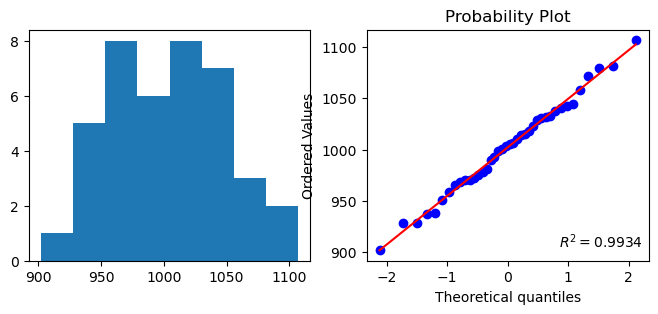

In [17]:
#直方图:钟型
plt.figure(figsize=(8,3))
plt.subplot(1,2,1)
plt.hist(sample,8)
#QQ图:若数据点偏离红色参考线，表明不符合目标分布
plt.subplot(1,2,2)
scipy.stats.probplot(sample, dist="norm", plot=plt,rvalue=True) 
plt.show()

## 独立样本T检验

### eg.1

In [77]:
#实验小学的校长认为实验小学的英语成绩比光明小学的英语成绩高
#提出假设 H0: 实验小学英语成绩平均值<=光明小学英语成绩平均值    实验小学英语成绩平均值-光明小学英语成绩平均值<=0
#        H1: 实验小学英语成绩平均值>光明小学英语成绩平均值     实验小学英语成绩平均值-光明小学英语成绩平均值>0
import numpy as np
from scipy.stats import shapiro, levene, ttest_ind

# 生成数据
np.random.seed(10)
shiyan_score = np.random.uniform(30, 100, 100).round(1)
right_score = np.random.uniform(20, 100, 120).round(1)

# 正态性检验
stat_shiyan, p_shiyan = shapiro(shiyan_score)
stat_right, p_right = shapiro(right_score)
#W 值：接近 1 表示接近正态，但需结合 p 值判断是否显著偏离正态。
print("实验小学正态性检验: W = {:.3f}, p = {:.3f}".format(stat_shiyan, p_shiyan))
print("光明小学正态性检验: W = {:.3f}, p = {:.3f}".format(stat_right, p_right))

# 方差齐性检验
levene_stat, levene_p = levene(shiyan_score, right_score)
#F 值：反映两组方差的相对差异程度，需结合 p 值判断是否显著。
print("\n方差齐性检验: F = {:.3f}, p = {:.3f}".format(levene_stat, levene_p))
equal_var = True if levene_p > 0.05 else False

# 独立样本t检验（单侧）
t_stat, p_value = ttest_ind(shiyan_score, right_score, 
                            equal_var=equal_var, 
                            alternative='greater')  # 备择假设：实验组均值 > 对照组
print("\nt统计量 = {:.3f}, p值 = {:.3f}".format(t_stat, p_value))

# 决策（显著性水平α=0.05）
alpha = 0.05
if p_value < alpha:
    print("\n结论：拒绝H0，实验小学英语成绩显著高于光明小学（p < 0.05）")
else:
    print("\n结论：未拒绝H0，无足够证据证明实验小学成绩更高")

实验小学正态性检验: W = 0.965, p = 0.009
光明小学正态性检验: W = 0.946, p = 0.000

方差齐性检验: F = 4.755, p = 0.030

t统计量 = 2.350, p值 = 0.010

结论：拒绝H0，实验小学英语成绩显著高于光明小学（p < 0.05）


In [79]:
#实验小学的 W = 0.965，p = 0.009（小于 0.05），说明实验小学的成绩数据 拒绝正态性假设。
#光明小学的 W = 0.946，p = 0.000（远小于 0.05），说明光明小学的成绩数据也 不服从正态分布。
#虽然数据不严格正态，但两校样本量较大（100 和 120），根据中心极限定理，仍可近似使用 t 检验（t 检验对大样本的非正态性具有一定稳健性）。

#Levene 检验的 F 统计量用于判断两组的方差是否齐性（即方差是否相等）。F 值越大，说明两组方差的差异越大。
#F = 4.755，p = 0.030（小于 0.05），说明 拒绝方差齐性假设，即两校成绩的方差不相等。
#由于方差不齐，在 t 检验中需使用 Welch 校正（即设置 equal_var=False），以修正方差不齐对检验结果的影响。

#t = 2.35，表示实验小学的平均分比光明小学高 2.35 个标准误单位。
#单侧检验的 p = 0.010（小于 0.05），说明在显著性水平 0.05 下，拒绝原假设 H0，接受备择假设 H1（实验小学均值显著高于光明小学）。

#依据备择假设H1确定alternative的方向
# > 	'greater'	右侧检验
# < 	'less'	左侧检验
#！=	'two-sided'	双侧检验


### eg.2

In [78]:
#A班使用传统教学法，B班使用新教学法。期末考试成绩如下：
#A班：[78, 85, 82, 90, 88]
#B班：[85, 88, 90, 92, 95]
#问题：假设两组成绩方差齐性，问两种教学方法效果是否有显著差异
#H0 A的均值=B的均值  A的均值 - B的均值 =0  双侧检验
from scipy import stats

group_a = [78, 85, 82, 90, 88]
group_b = [85, 88, 90, 92, 95]
t_stat, p_value = stats.ttest_ind(group_a, group_b, equal_var=True,alternative='two-sided')

print("T值:", round(t_stat, 4))
print("P值:", round(p_value, 4))
if p_value < 0.05:
    print("结论: 拒绝原假设，效果差异显著")
else:
    print("结论: 不拒绝原假设，无显著差异")

T值: -1.9771
P值: 0.0834
结论: 不拒绝原假设，无显著差异


## 配对样本T检验

In [19]:
#配对样本T检验
#补课后比补课前有显著差异
before = [72, 80, 85, 70, 78]
after = [68, 76, 80, 72, 75]

#提出假设 
#H0:补课后-补课前差值的均值<=0  #无显著差异
#H1:补课后-补课前差值的均值>0  #有显著差异

#公式实现
diff = np.array(after)- np.array(before)

#检验差值值的正态性
s,p = stats.shapiro(diff) #原假设为正态
alpha =0.05
if p>0.05:
    print("配对差正态性")
else:
    print("配对差非正态性")

# 手动计算T统计量
n = len(diff)
diff_mean = diff.mean()
diff_std = diff.std(ddof=1)  # 样本标准差（无偏估计）
standard_error = diff_std / np.sqrt(n)  # 标准误
t_stat_manual = diff_mean / standard_error  # T值

# 计算P值（右侧检验，H1: μ_d > 0）
p_value_manual = 1 - stats.t.cdf(t_stat_manual, df=n-1)
print(f"公式计算 T值: {t_stat_manual:.2f}, P值: {p_value_manual:.4f}")

#scipy包函数实现
t_stat, p_value =stats.ttest_rel(after,before,alternative='greater')
alph =0.05
print(f"函数计算 T值: {t_stat:.2f}, P值: {p_value:.4f}")
if p_value<0.05:
    print("拒绝H0,有显著差异")
else:
    print("不拒绝H0，无显著差异")

配对差正态性
公式计算 T值: -2.26, P值: 0.9565
函数计算 T值: -2.26, P值: 0.9565
不拒绝H0，无显著差异
